# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.corpus import stopwords

# Imporiting Words List to be used 

### Positive word List

In [3]:
pos=pd.read_csv('positive-words.txt',sep='\n',  encoding='cp1252',header=None)
pos.iloc[30:40,:]

,0
30,; mistakes. They are included as these m...
31,; frequently in social media content.
32,;
33,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
34,a+
35,abound
36,abounds
37,abundance
38,abundant
39,accessable


In [4]:
pos[pos[0]=='a+'].index.values

array([34], dtype=int64)

In [5]:
pos.drop(range(0,35),axis=0,inplace=True)
pos.reset_index(inplace=True)

In [6]:
pos.drop(labels=['index'],axis=1,inplace=True)
pos.head()

,0
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [7]:
pos['Value']=np.ones(shape=(pos.shape[0]),dtype=int)

In [8]:
pos

,0,Value
0,abound,1
1,abounds,1
2,abundance,1
3,abundant,1
4,accessable,1
...,...,...
2000,youthful,1
2001,zeal,1
2002,zenith,1
2003,zest,1


# Negative Words List

In [9]:
neg=pd.read_csv('negative-words.txt',sep='\n',  encoding='cp1252',header=None , )
neg.head(5)


,0
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1,;
2,; Opinion Lexicon: Negative
3,;
4,; This file contains a list of NEGATIVE opinio...


In [17]:
neg[neg[0]=='2-faces'].index.values

array([], dtype=int64)

In [18]:
neg.drop(range(0,36),axis=0,inplace=True)
neg.reset_index(inplace=True)

In [19]:
neg.drop(labels=['index'],axis=1,inplace=True)
neg.head()

,0,Value
0,afflictive,-1
1,affront,-1
2,afraid,-1
3,aggravate,-1
4,aggravating,-1


In [20]:
neg['Value']=[-1 for i in range(0,neg.shape[0])]

In [21]:
neg

,0,Value
0,afflictive,-1
1,affront,-1
2,afraid,-1
3,aggravate,-1
4,aggravating,-1
...,...,...
4704,zaps,-1
4705,zealot,-1
4706,zealous,-1
4707,zealously,-1


__List Combine__

In [39]:
all_words = neg.append(pos)
all_words

,0,Value
0,afflictive,-1
1,affront,-1
2,afraid,-1
3,aggravate,-1
4,aggravating,-1
...,...,...
2000,youthful,1
2001,zeal,1
2002,zenith,1
2003,zest,1


### Stop Words

In [22]:
stop1=stopwords.words('english')
list(stop1)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
stop2=pd.read_csv('stop.txt',sep='\n',  encoding='cp1252',header=None)
stop2=np.array(stop2).flatten()
stop2=list(stop2)
stop2

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [24]:
stop=stop1+stop2
print(len(stop))
stop3=set(stop)
print(len(stop3))

750
599


# Tweet list

In [25]:
df=pd.read_csv('Elon_musk.csv', encoding='cp1252')


In [26]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [27]:
df.rename(columns={'Unnamed: 0': 'Index'},inplace=True)

In [28]:
df.drop(labels=['Index'],axis=1,inplace=True)

In [29]:
df.shape

(1999, 1)

# Text Preprocessing

In [30]:
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()


In [31]:
text=df['Text']

In [32]:
import re

In [35]:
X=[]
for i in range(len(text)):
    sent=text[i].strip()
    sent=re.sub(r'[^a-zA-z]',' ',text[i])
    sent=re.sub('_',' ',sent)
    sent=sent.lower()
    words=nltk.word_tokenize(sent)
    sent=[wnl.lemmatize(word) for word in words if not word in stop3]
    sent=' '.join(sent)
    X.append(sent)
    

In [37]:
X

['kunalb alien',
 'id aa carmack ray tracing cyberpunk hdr level',
 'joerogan spotify great interview',
 'gtera doge underestimated',
 'teslacn congratulation tesla china amazing execution year',
 'happy year ox http wfkmyu oj',
 'frodo underdoge thought fail http zgxjfdzzrm',
 'owensparks flcnhvy anonyx haha',
 'flcnhvy anonyx tweet represent real world time allocation',
 'entertaining outcome',
 'givedirectly',
 'agree clubhouse kanyewest',
 'http rwe uhsts',
 'geoffkeighley unrealengine real',
 'bought dogecoin lil toddler hodler',
 'joshmanmode issue sentencing bit high',
 'freewalletorg fixing',
 'freewalletorg unlock account',
 'astrojordy',
 'true power haha http fc uhqsd',
 'freewalletorg crypto wallet give private key avoided cost',
 'freewalletorg app suck',
 'rt spacex nasa selected falcon heavy launch element lunar gateway mission http pwt',
 'ajtourville',
 'blkmdl rationaletienne adamklotz predict cash flow starlink ipo',
 'rationaletienne adamklotz starlink staggeringly 

In [42]:
txt=' '.join(X)
txt

'kunalb alien id aa carmack ray tracing cyberpunk hdr level joerogan spotify great interview gtera doge underestimated teslacn congratulation tesla china amazing execution year happy year ox http wfkmyu oj frodo underdoge thought fail http zgxjfdzzrm owensparks flcnhvy anonyx haha flcnhvy anonyx tweet represent real world time allocation entertaining outcome givedirectly agree clubhouse kanyewest http rwe uhsts geoffkeighley unrealengine real bought dogecoin lil toddler hodler joshmanmode issue sentencing bit high freewalletorg fixing freewalletorg unlock account astrojordy true power haha http fc uhqsd freewalletorg crypto wallet give private key avoided cost freewalletorg app suck rt spacex nasa selected falcon heavy launch element lunar gateway mission http pwt ajtourville blkmdl rationaletienne adamklotz predict cash flow starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor http ac skqx rationaletienne adamklotz spacex pas deep chas

In [43]:

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

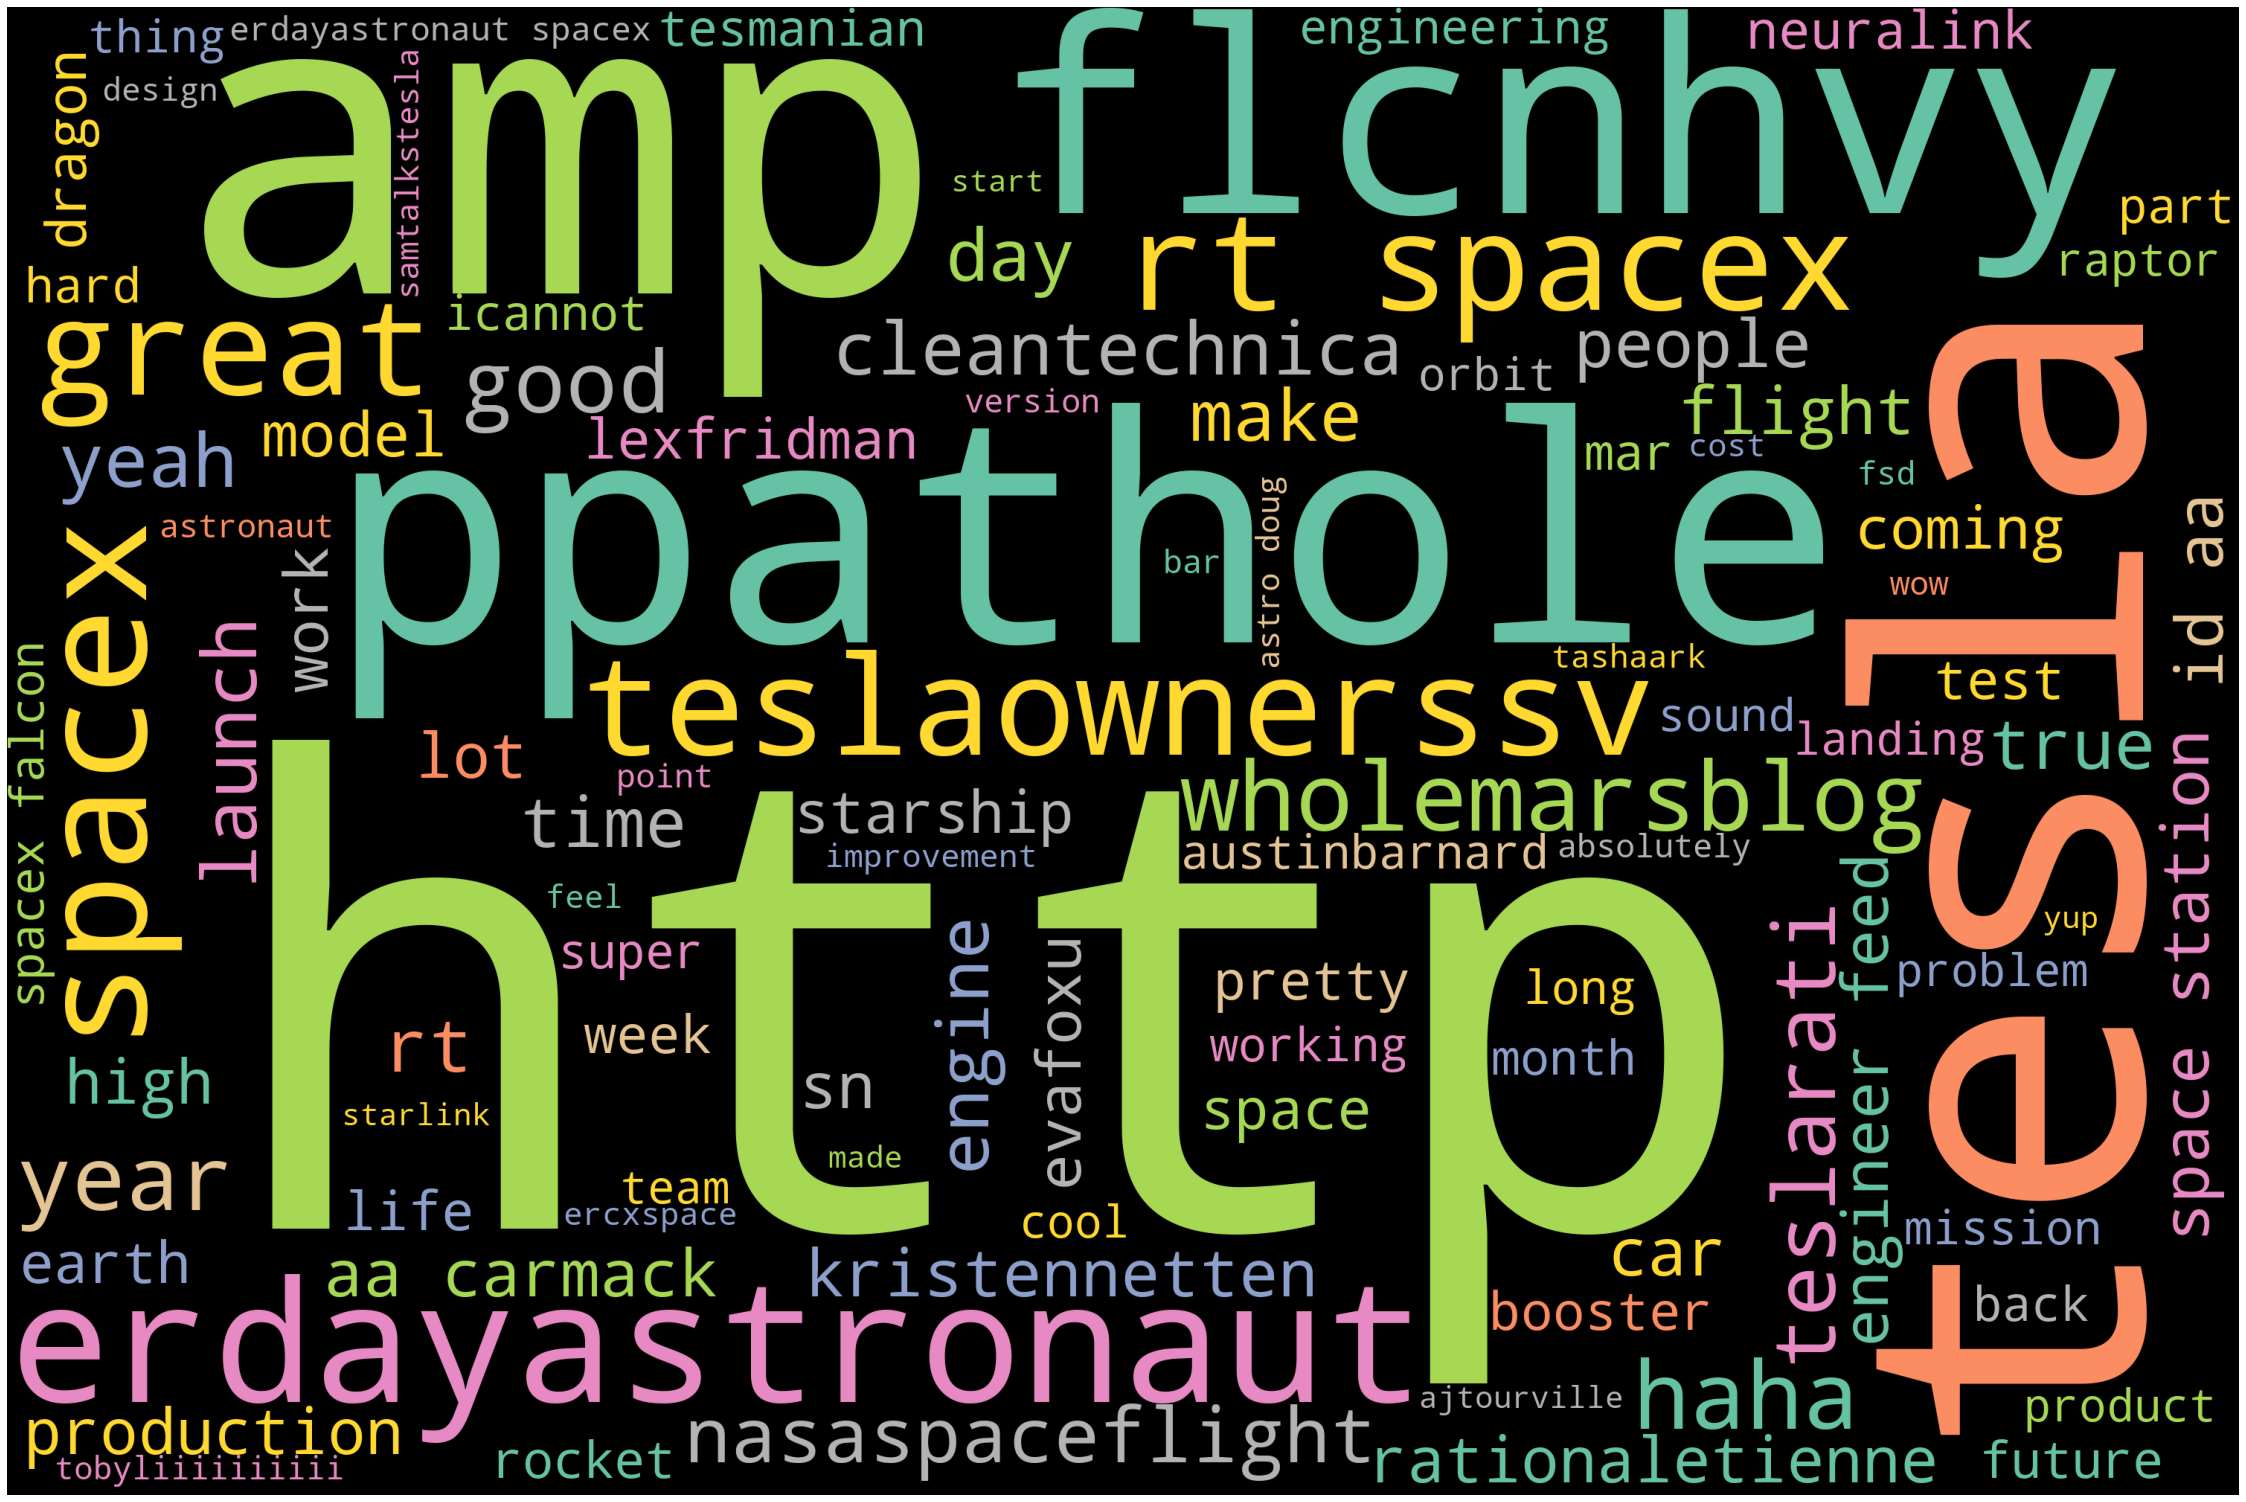

In [45]:
# Generate wordcloud
stop.append('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stop).generate(txt)
# Plot
plot_cloud(wordcloud)

In [47]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")
doc_block = nlp(txt)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [48]:
all_scores = all_words.set_index(0)['Value'].to_dict()
all_scores

{'afflictive': -1,
 'affront': -1,
 'afraid': -1,
 'aggravate': -1,
 'aggravating': -1,
 'aggravation': -1,
 'aggression': -1,
 'aggressive': -1,
 'aggressiveness': -1,
 'aggressor': -1,
 'aggrieve': -1,
 'aggrieved': -1,
 'aggrivation': -1,
 'aghast': -1,
 'agonies': -1,
 'agonize': -1,
 'agonizing': -1,
 'agonizingly': -1,
 'agony': -1,
 'aground': -1,
 'ail': -1,
 'ailing': -1,
 'ailment': -1,
 'aimless': -1,
 'alarm': -1,
 'alarmed': -1,
 'alarming': -1,
 'alarmingly': -1,
 'alienate': -1,
 'alienated': -1,
 'alienation': -1,
 'allegation': -1,
 'allegations': -1,
 'allege': -1,
 'allergic': -1,
 'allergies': -1,
 'allergy': -1,
 'aloof': -1,
 'altercation': -1,
 'ambiguity': -1,
 'ambiguous': -1,
 'ambivalence': -1,
 'ambivalent': -1,
 'ambush': -1,
 'amiss': -1,
 'amputate': -1,
 'anarchism': -1,
 'anarchist': -1,
 'anarchistic': -1,
 'anarchy': -1,
 'anemic': -1,
 'anger': -1,
 'angrily': -1,
 'angriness': -1,
 'angry': -1,
 'anguish': -1,
 'animosity': -1,
 'annihilate': -1,
 '

In [49]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = all_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [50]:
# test that it works
calculate_sentiment(text = 'amazing')

1

In [51]:
df['sentiment_value'] = df['Text'].apply(calculate_sentiment)

In [54]:
# how many words are in the sentence?
df['word_count'] = df['Text'].str.split().apply(len)
df['word_count'].head(20)

0      4
1     13
2      4
3      4
4     17
5      7
6     14
7      6
8     11
9      8
10     4
11     7
12     1
13     5
14    13
15    12
16     4
17     5
18     2
19     6
Name: word_count, dtype: int64

In [55]:
df.sort_values(by='sentiment_value').tail(10)

,Text,sentiment_value,word_count
859,@TesLatino Thanks to a great Autopilot/AI team...,3,18
458,@teslaownerssv It will get absurdly good. Tesl...,3,18
1222,@FutureJurvetson @hiromichimizuno Thanks for y...,3,13
1510,"@Teslarati We really need a bigger one, so adu...",4,24
468,@picot_john @CyberpunkGame It’s a good to grea...,4,20
1388,"@GerberKawasaki Wow, I super loved astronomy (...",4,20
1357,Great trip to Germany. Support from government...,4,12
770,Such a privilege to work with people I like &a...,4,16
1172,Thanks Tesla Team for great work on deliveries...,5,20
1304,"One way or another, excitement guaranteed! Sup...",5,17


In [52]:
# Sentiment score of the whole review
df['sentiment_value'].describe()

count    1999.000000
mean        0.216108
std         0.856186
min        -4.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: sentiment_value, dtype: float64

In [53]:
# Sentiment score of the whole review
df[df['sentiment_value']<=0].head()

,Text,sentiment_value,word_count
0,@kunalb11 I’m an alien,0,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
3,@gtera27 Doge is underestimated,-1,4
6,"Frodo was the underdoge,\nAll thought he would...",-1,14
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,11


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

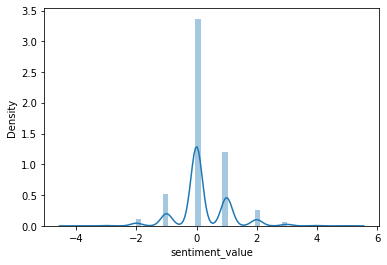

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['sentiment_value'])

<AxesSubplot:ylabel='sentiment_value'>

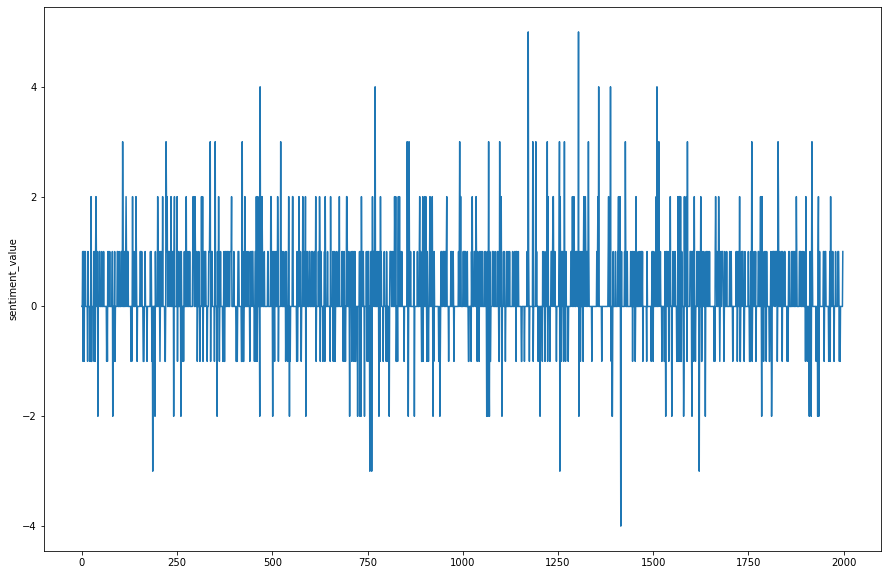

In [56]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x=df.index,data=df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

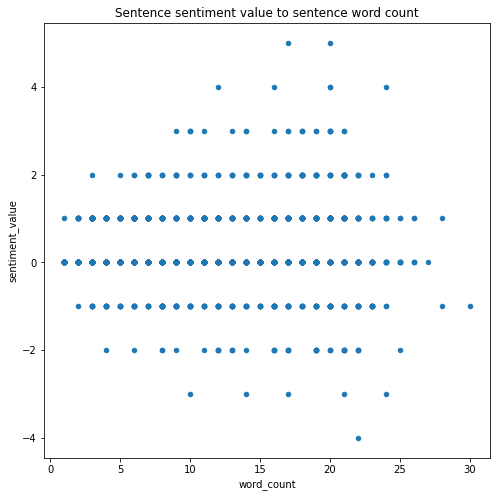

In [57]:
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [144]:
cv.fit_transform(X)

<1999x4941 sparse matrix of type '<class 'numpy.int64'>'
	with 13536 stored elements in Compressed Sparse Row format>

In [146]:
len(cv.get_feature_names())

4941

In [147]:
cv.vocabulary_

{'kunalb': 2287,
 'alien': 131,
 'id': 1949,
 'aa': 0,
 'carmack': 585,
 'ray': 3397,
 'tracing': 4337,
 'cyberpunk': 916,
 'hdr': 1804,
 'level': 2364,
 'joerogan': 2174,
 'spotify': 3932,
 'great': 1722,
 'interview': 2075,
 'gtera': 1741,
 'doge': 1091,
 'underestimated': 4452,
 'teslacn': 4181,
 'congratulation': 798,
 'tesla': 4177,
 'china': 670,
 'amazing': 148,
 'execution': 1341,
 'year': 4851,
 'happy': 1780,
 'ox': 2993,
 'http': 1909,
 'wfkmyu': 4683,
 'oj': 2909,
 'frodo': 1567,
 'underdoge': 4451,
 'thought': 4257,
 'fail': 1385,
 'zgxjfdzzrm': 4907,
 'owensparks': 2989,
 'flcnhvy': 1494,
 'anonyx': 178,
 'haha': 1762,
 'tweet': 4394,
 'represent': 3488,
 'real': 3417,
 'world': 4753,
 'time': 4273,
 'allocation': 134,
 'entertaining': 1268,
 'outcome': 2968,
 'givedirectly': 1680,
 'agree': 95,
 'clubhouse': 719,
 'kanyewest': 2222,
 'rwe': 3618,
 'uhsts': 4422,
 'geoffkeighley': 1655,
 'unrealengine': 4480,
 'bought': 476,
 'dogecoin': 1093,
 'lil': 2386,
 'toddler': 43